   # TSF Task-1
   ## Prediction using Supervised ML
   In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of    hours they studied. This is a simple linear regression task.
  
  **Created by :- Hrishikesh Charkha**

**The question here is What will be predicted score if a student studies for 9.25 hrs/ day?**

Let's find out.

**Step 1- Imports**

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Step-2 Reading the CSV file**

In [7]:
scores = pd.read_csv("student_scores - student_scores.csv")

In [12]:
scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [13]:
#Checking the shape of the data

scores.shape

(25, 2)

In [16]:
#Checking the names of the Columns

scores.columns

Index(['Hours', 'Scores'], dtype='object')

In [18]:
#Is there any null values
scores.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [19]:
# Describing the Data
scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [22]:
#Getting the informartion of the Data
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes




Now, we know there is no null values present 

**Step-3 Exploratory Data Analysis**

In [23]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

Text(0, 0.5, 'Percentage Score')

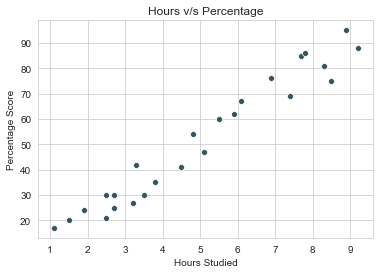

In [24]:
sns.scatterplot(data=scores,x= 'Hours',y= 'Scores')
plt.title('Hours v/s Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

Here, we can see a linear-like relationship and hence, we use Linear Regression.

**Step-4 Training and Testing the Data for Linear Regression Model**

In [41]:
x= scores.iloc[:,:-1].values
y= scores.iloc[:,1].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.25 , random_state = 101)

In [42]:
lm = LinearRegression()

In [43]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
predictions= lm.predict(x_test)
predictions

array([27.1673772 , 77.3333132 , 39.7088612 , 74.43912458, 56.10926335,
       49.35615658, 33.92048397])

In [47]:
print(lm.coef_)

[9.64729538]


We know the line's slope and interecept(which is zero in this case)

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score.

In [49]:
print('MAE: ', metrics.mean_absolute_error(y_test,predictions))
print('MSE: ', metrics.mean_squared_error(y_test,predictions))
print('RMSE: ', np.sqrt(metrics.mean_absolute_error(y_test,predictions)))

MAE:  5.157479916955566
MSE:  29.02221430831264
RMSE:  2.271008568225925


In [63]:
score_for_question = lm.predict([[9.25]])
print ("The predicted score for 9.25 hours is") 
print(score_for_question)

The predicted score for 9.25 hours is
[92.28662104]
